In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.manifold import TSNE
import plotly.express as px

In [12]:
path_to_read_data = "../Data/Dataset/vietnamnet/clean_v1.csv"
path_to_read_data_2 = "../Data/Dataset/vietnamnet/clean_v2.csv"
path_to_read_data_3 = "../Data/Dataset/clean_v1.csv"
data = pd.read_csv(path_to_read_data)
data2 = pd.read_csv(path_to_read_data_2)
data3 = pd.read_csv(path_to_read_data_3)

In [ ]:
# tf_idf = TfidfVectorizer(min_df=2)
# tf_idf_pre = tf_idf.fit_transform(data["Content"])

In [ ]:


# tsne = TSNE(n_components=3, random_state=0)
# projections = tsne.fit_transform(tf_idf_pre, )

# fig = px.scatter_3d(
#     projections, x=0, y=1, z=2,
#     color=data.label, labels={'color': 'Label'}
# )
# fig.update_traces(marker_size=4)
# fig.show()


In [ ]:
# data["Labels"] = data["Label"]
# data["Contents"] = data["Content"]
# data = data.drop(["Label", "Content"], axis= 1)

In [13]:
import visualizing
visualier = visualizing.Visualizer(data)
visualier2 = visualizing.Visualizer(data2)
visualier3 = visualizing.Visualizer(data3)


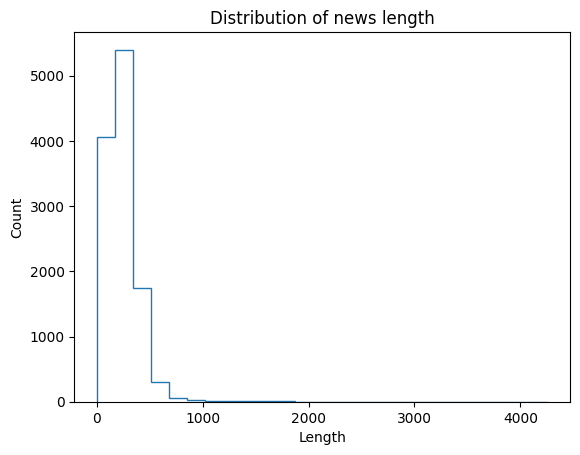

In [9]:
visualier.hist_length("Content_cleaned", True)

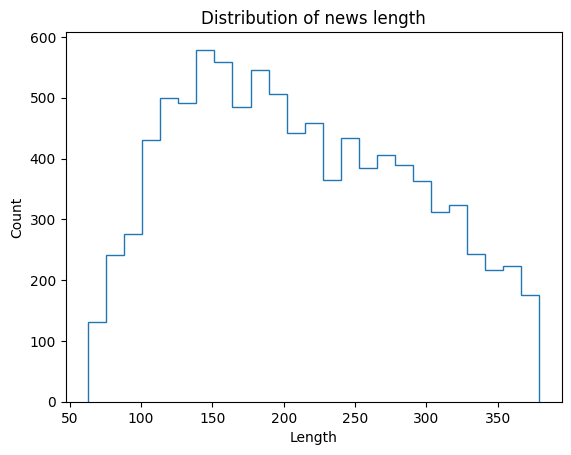

In [14]:
visualier2.hist_length("Content_cleaned", True)

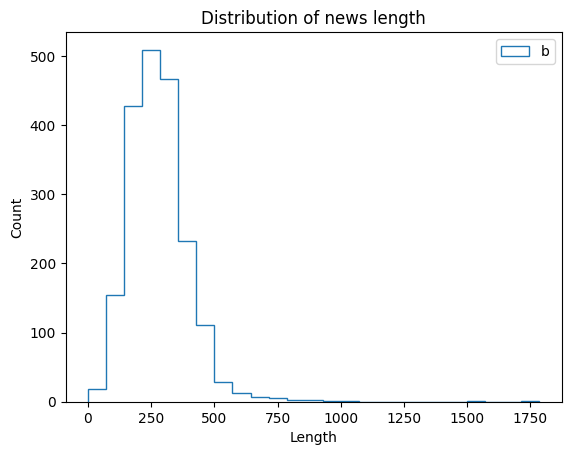

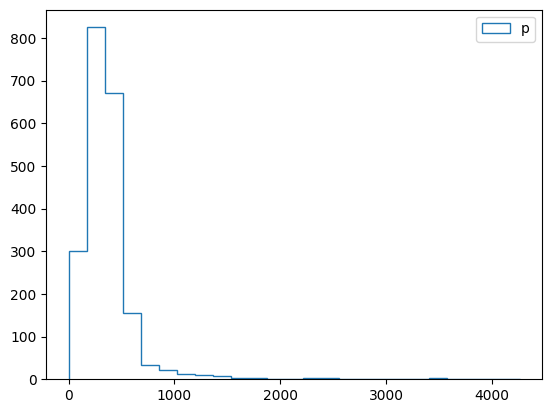

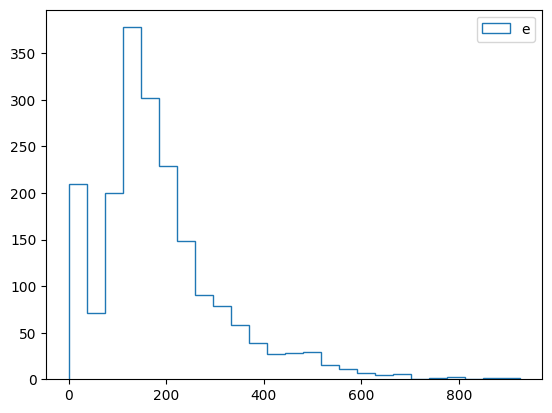

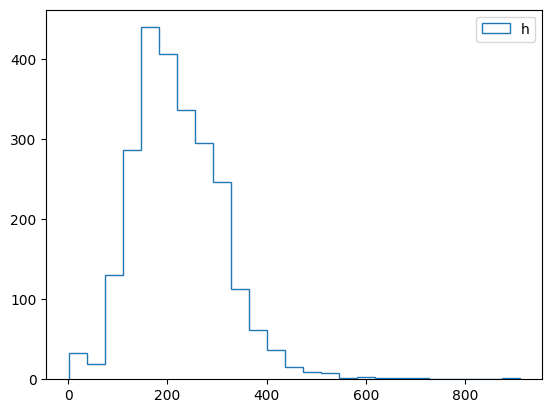

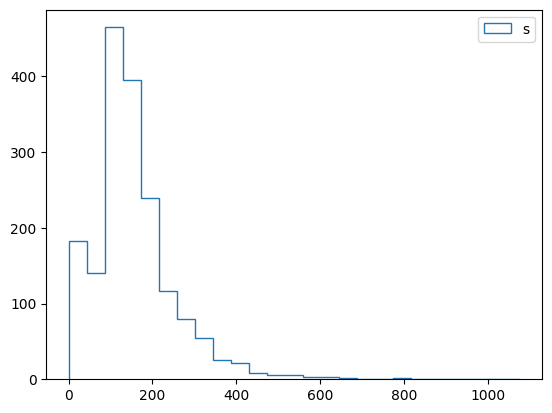

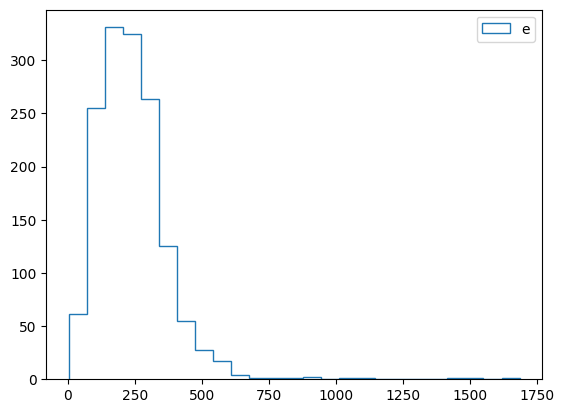

In [10]:
visualier.hist_length("Content_cleaned")

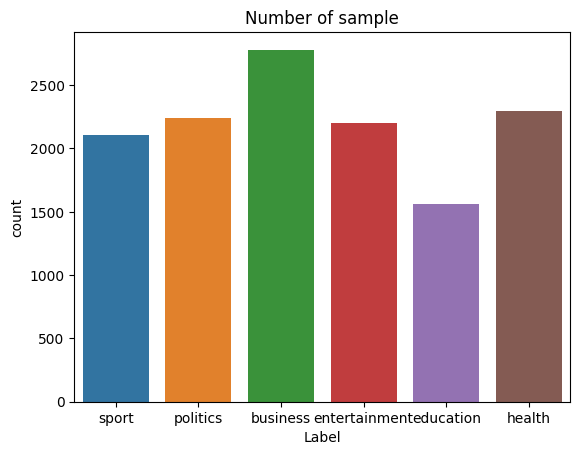

In [14]:
visualier3.hist_samples()

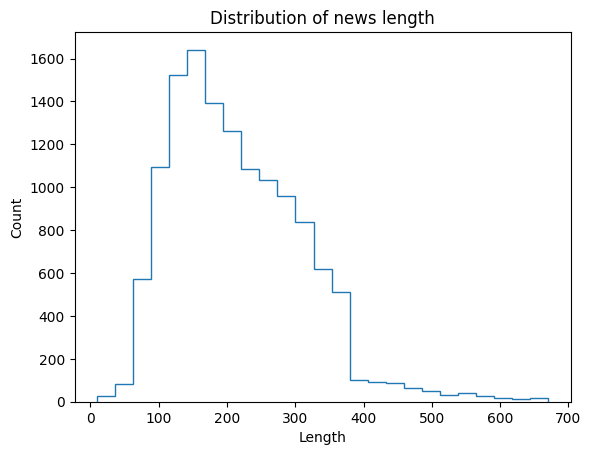

In [15]:
visualier3.hist_length("Content_cleaned", True)

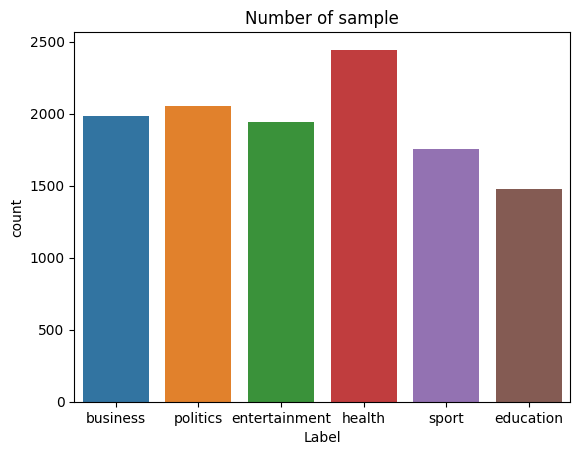

In [15]:
visualier.hist_samples()

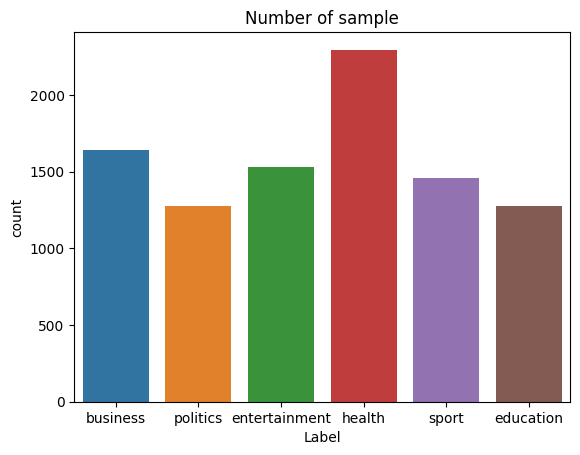

In [16]:
visualier2.hist_samples()

In [ ]:
visualier.wordBarGraphFunction("Content_cleaned", True)
# topic_words = [z.lower() for y in
#                      [x.split()
#                       for x in data["Content_cleaned"] if isinstance(x, str)]
#                      for z in y]
#       word_count_dict = dict(Counter(topic_words))
#       popular_words = sorted(
#           word_count_dict, key=word_count_dict.get, reverse=True)
#       popular_words_nonstop = [w for w in popular_words]
#       plt.figure(figsize=(10, 11))
#       plt.barh(range(50), [word_count_dict[w]
#                            for w in reversed(popular_words_nonstop[0:50])])
#       plt.yticks([x + 0.5 for x in range(50)],
#                  reversed(popular_words_nonstop[0:50]))
#       plt.title("chung")

#       plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a toy corpus
# corpus = ['this is document one', 'this is document two', 'this is document three', 'this is document four', 'this is document five']

# Create a CountVectorizer object and fit it to the corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Content_cleaned"])

# Get the vocabulary and document frequency (df) for each term
vocab = vectorizer.vocabulary_
df = X.sum(axis=0)

# Calculate the max_df threshold (e.g., 0.8)
max_df = 0.8 * len(data["Content_cleaned"])
min_df = 2
# Get the list of terms that exceed the max_df threshold
max_df_terms = [term for term in vocab if df[0, vocab[term]] > max_df]
min_df_terms = [term for term in vocab if df[0, vocab[term]] < min_df]



In [ ]:
len(min_df_terms), len(max_df_terms), len(vocab)

In [ ]:
max_df_terms

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# corpus = ['this is the first document', 'this is the second document', 'this is the third document', 'this is the fourth document']

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(data["Content_clean2"])

min_df = 2

# Get list of words in the vocabulary
vocab = vectorizer.get_feature_names()

# Create empty list to store words to be removed
words_to_remove = []

# Iterate through the columns of the document-term matrix and count the number of documents that contain each word
for i in range(len(vocab)):
    word_count = sum(dtm[:,i]>0)
    if word_count < min_df:
        words_to_remove.append(vocab[i])

print(words_to_remove)


In [ ]:
len(max_df_terms)

In [ ]:
new_docs = []
for doc in data["Content_clean2"]:
  new_doc = " ".join([word for word in doc.split() if word not in min_df_terms])
  new_docs.append(new_doc)
data["content_3"] = new_docs

In [ ]:
data["Length3_remove_mindf"] = data["content_3"].apply(lambda doc: len(str(doc).split()))

In [ ]:
data

In [ ]:
visualier.wordBarGraphFunction("content_3")

In [ ]:
comment_words = ''
# iterate through the csv file
for val in data["Content_clean"]:
    val = str(val)

    # split the value
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      contour_color='steelblue',
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("word cloud {} news".format("all"))
plt.show()

In [ ]:
plt.hist(data["Length"], bins=25, histtype=u'step')
plt.show()

In [ ]:
plt.hist(data["Length"], bins=25, histtype=u'step')
plt.show()

In [ ]:
data[data["Label"]=="health"]["Length"].plot.kde()

In [ ]:
data["Length"].plot.kde()

In [ ]:
data.boxplot("Length")

In [ ]:
visualier.hist_length()